<a href="https://colab.research.google.com/github/uttu125/Deep_Learning_Tensorflow/blob/master/Deep_learning_in_Health_care_%7C%7C_Image_Classification_using(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Reference for this notebook:
# https://www.youtube.com/watch?v=Fxy6WTnUIww

In [2]:
from google.colab import files

# connecting google colab with kaggle
# the uploaded file is new token generated (automatically downloaded in lappy) from Kaggle Account section
# one can see this uploaded json file in files section (left panel) and then inside content folder
uploaded = files.upload()
print(uploaded)
print("type of uploaded files:", type(uploaded))

Saving kaggle.json to kaggle.json
{'kaggle.json': b'{"username":"purushottamraj","key":"5b746ca713a8556422743853cfcc97a5"}'}
type of uploaded files: <class 'dict'>


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "kaggle.json" with length 70 bytes


In [4]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Let's break down each part of this command:

1. **`!mkdir -p ~/.kaggle/`**:
   - `!` at the beginning of the command is used in some environments (like Jupyter notebooks) to indicate that it's a shell command.
   - `mkdir` stands for "make directory." It is used to create directories.
   - `-p` is a flag that tells `mkdir` to create the entire path, including any intermediate directories that do not exist.
   - `~/.kaggle/` is the path where the directory is created. `~` refers to the home directory of the current user, and `.kaggle` is a hidden directory in that home directory.

2. **`&&`**:
   - This is a logical AND operator in the shell. It is used to chain commands together. The second command will only run if the first command completes successfully.

3. **`mv kaggle.json ~/.kaggle/`**:
   - `mv` stands for "move." It is used to move files from one location to another.
   - `kaggle.json` is the file to be moved.
   - `~/.kaggle/` is the destination directory where the file will be moved.

4. **`&&`** (again):
   - Another logical AND operator to chain commands.

5. **`chmod 600 ~/.kaggle/kaggle.json`**:
   - `chmod` stands for "change mode." It is used to change the permissions of a file.
   - `600` sets the permissions of the file to be read and write for the owner, and no permissions for anyone else.
   - `~/.kaggle/kaggle.json` is the file whose permissions are being set.

So, the entire command does the following:
- Creates a hidden directory `.kaggle` in the user's home directory if it doesn't already exist.
- Moves the `kaggle.json` file to this `.kaggle` directory.
- Sets the permissions of the `kaggle.json` file so that only the owner can read and write to it, and no one else has any permissions.



By following these steps, you ensure that:
- The Kaggle API has a dedicated directory for its configuration.
- The API credentials are securely stored.
- Only you have access to modify or read the `kaggle.json` file, protecting your account from unauthorized use.


In [5]:
# this is for downloading datasets from Kaggle to Colab
# see this downloaded zip file in left panel, file section and folder content
# must check how data is created
# Note: Yes, and no folders are also created separately
# command : !kaggle datasets download -d
# last part is API for that dataset from Kaggle : navoneel/brain-mri-images-for-brain-tumor-detection
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 33% 5.00M/15.1M [00:00<00:00, 28.6MB/s]
100% 15.1M/15.1M [00:00<00:00, 64.8MB/s]


In [6]:
import tensorflow as tf
import os, glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

In [7]:
# copy path of downloaded zip file
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

# after running this, one can see yes (having Brain Tumor) and no (no Brain Tumor)
# inside brain_tumor_dataset folder which is inside content folder
# folder which contains images just unzipping

Done


In [8]:
# just changing path to get yes image first
os.chdir('/content/yes')

# x list is created to store images
X = []

# y list is created to store labels
y = []

# tqdm is used just to see progress bar meaning how much percentage of images are appended in x list
# see output to get idea
for i in tqdm(os.listdir()):
    print(i)
    img = cv2.imread(i)
    img = cv2.resize(img,(224,224))
    X.append(img)
    # check first character if i printed, Y denotes Yes
    y.append((i[0:1]))
    print(i[0:1])
    print("*"*51)

  0%|          | 0/155 [00:00<?, ?it/s]

Y47.JPG
Y
***************************************************
Y34.jpg
Y
***************************************************
Y2.jpg
Y
***************************************************
Y247.JPG
Y
***************************************************
Y109.JPG
Y
***************************************************
Y45.JPG
Y
***************************************************
Y73.jpg
Y
***************************************************
Y4.jpg
Y
***************************************************
Y251.JPG
Y
***************************************************
Y33.jpg
Y
***************************************************
Y59.JPG
Y
***************************************************
Y162.jpg
Y
***************************************************
Y13.jpg
Y
***************************************************
Y49.JPG
Y
***************************************************
Y160.JPG
Y
***************************************************
Y194.jpg
Y
***************************************************
Y116

In [9]:
# now moving to no label
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,99):
    y.append('N')
print(y)

  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

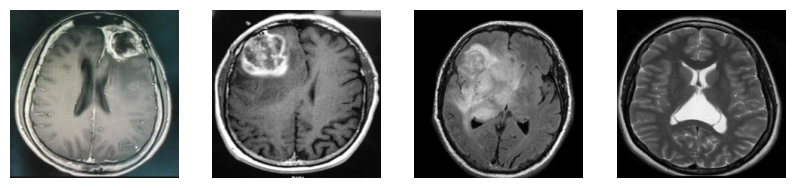

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [15]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
print(type(y_train))
print(y_test)
print("*"*51)

# if label is zero then flag 1 for that cell in that row and
# if label is one then flag 1 for that cell in that row
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
print(type(y_train))
print(y_test)
print("*"*51)

y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

<class 'numpy.ndarray'>
[0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 0 1 1 1]
***************************************************
<class 'numpy.ndarray'>
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]

The reason we use `tf.keras.utils.to_categorical(y_train, num_classes=2)` in deep learning is to convert class labels into a one-hot encoded format. This step is crucial for many classification tasks in deep learning, particularly when working with neural networks.

Here's why:

1. **Compatibility with Neural Networks:**
   Neural networks often expect the target labels to be in a one-hot encoded format, where each class label is represented by a binary vector. For example, if you have two classes, `0` and `1`, one-hot encoding will transform them as follows:
   - Class `0`: `[1, 0]`
   - Class `1`: `[0, 1]`

2. **Softmax Activation:**
   When using a softmax activation function in the output layer of a neural network, the output is typically a probability distribution over the classes. One-hot encoding the target labels allows the network to compute the cross-entropy loss efficiently, comparing the predicted probabilities with the one-hot encoded true labels.

3. **Clearer Gradient Signals:**
   One-hot encoding provides clearer gradient signals for backpropagation, helping the model learn the correct class more effectively. If the target labels were just integers, the gradients might not be as informative for optimizing the weights.

4. **Consistent Label Format:**
   One-hot encoding ensures a consistent format for the target labels across different models and tasks, making it easier to integrate into various deep learning workflows.

So, in summary, while traditional machine learning algorithms can work directly with integer class labels, deep learning models benefit from the one-hot encoded format for better training and performance.



In [21]:
from keras.applications import vgg16

# passing image height and width into these variables
img_rows, img_cols = 224, 224

# Not building CNN model from scratch so using pre-trained-model (transfer learning)
# VGG16 is one of the trained model
# weights = 'imagenet' meaning using imagenet dataset and their weight,
# if none for weights parameter then Initialize weights randomly this is required when build scratch model

# include_top meaning want to include top/output layer of pre-trained model
# by default True but imagenet dataset have around 20,000 classes but in this dataset only 2 so False
# other parameters are pooling, classes etc
vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Layers are set to trainable as True by default
# want to use same weights of pretrained model so False, it will save time etc
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [22]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
# adding more layers after last layer of pre-trained vgg model meaning customizing
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

# see output of last cell and then this cell, more layers are added so few more rows in this table
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 16,815,426 (64.15 MB)

 Trainable params: 2,100,738 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [25]:
FC_Head

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_23>

In [26]:
vgg.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>

In [27]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [28]:
history = model.fit(X_train,y_train,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)
history

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 196s 35s/step - accuracy: 0.5167 - loss: 6.4981 - val_accuracy: 0.6071 - val_loss: 1.2367
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 186s 33s/step - accuracy: 0.6718 - loss: 1.2299 - val_accuracy: 0.4881 - val_loss: 1.3070
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 169s 27s/step - accuracy: 0.7624 - loss: 0.5854 - val_accuracy: 0.6905 - val_loss: 0.9156
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 234s 33s/step - accuracy: 0.8255 - loss: 0.4054 - val_accuracy: 0.7738 - val_loss: 0.6753
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 173s 27s/step - accuracy: 0.8701 - loss: 0.2631 - val_accuracy: 0.8214 - val_loss: 0.5749


In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('train acc:',acc)
print('val acc:',val_acc)
print('train loss:',loss)
print('val loss:',val_loss)

train acc: [0.526627242565155, 0.6804733872413635, 0.7810651063919067, 0.8757396340370178, 0.9112426042556763]
val acc: [0.6071428656578064, 0.488095223903656, 0.6904761791229248, 0.773809552192688, 0.8214285969734192]
train loss: [6.1365180015563965, 1.1567422151565552, 0.49989038705825806, 0.30913859605789185, 0.1976517289876938]
val loss: [1.2366670370101929, 1.3070279359817505, 0.9155760407447815, 0.6752766370773315, 0.5748633146286011]


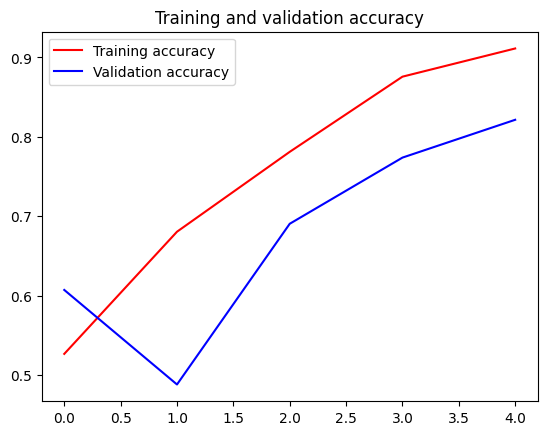

<Figure size 640x480 with 0 Axes>

In [30]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()